# Linear regression using gradient descent

In [1]:
import torch
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
n = 200

In [3]:
x = torch.ones(n).uniform_(-1.,1)
x[:5]

tensor([-0.9179,  0.4197,  0.0367,  0.0437, -0.9233])

In [4]:
a = 3.231
b = -0.5
a,b

(3.231, -0.5)

In [5]:
noise = torch.randn(n)
noise[:5]

tensor([-1.2905, -1.3050, -0.7464, -1.7737,  0.3726])

In [6]:
y = a * x + b
y_noisy = y + noise

In [7]:
x.numpy().ndim

1

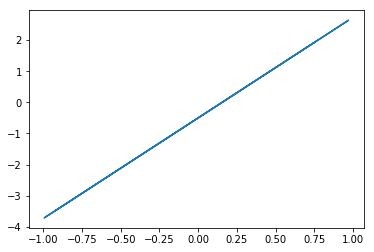

In [9]:
plt.plot(x.numpy(),y.numpy())

### Monkey patch Tensor class so that it works with matplotlib

In [ ]:
torch.Tensor.ndim = property(lambda self: len(self.shape))

In [ ]:
fig = plt.figure(figsize=[10,7])
plt.plot(x,y,c='green')
plt.scatter(x,y_noisy, marker='.', c='grey')

### Make this line up better with DL by using matrix multiplication

In [ ]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

In [ ]:
a = torch.Tensor([a,b])

In [ ]:
y = x@a + torch.randn(n)

In [ ]:
fig = plt.figure(figsize=[10,7])

plt.plot(x[:,0],x@a,c='green')
plt.scatter(x[:,0],y, marker='.', c='grey')

### Define a loss function

In [ ]:
def mse(y,y_pred):
    return ((y-y_pred)**2).mean()

## starting guess a = (-1,1)

In [ ]:
a = torch.tensor([-1.,1])

#### Initial loss

In [ ]:
start_loss = mse(x@a,y)
start_loss

In [ ]:
fig = plt.figure(figsize=[10,7])
plt.plot(x[:,0],x@a,c='red')
plt.scatter(x[:,0],y, marker='.', c='grey')

### Gradient Descent

#### learning rate lr

$$ mse=\frac{\sum{(y_{pred}-y)^{2}}}{n}$$
$$mse=\frac{\sum{(a_0 x + a_1 -y)^{2}}}{n}$$

$$ \frac{\partial{mse}}{\partial{a_0}} = \frac{2 \sum{(a_0 x+a_1 - y)} x}{n} = \frac{2 \sum{(y_{pred} - y)}x}{n}  $$

$$ \frac{\partial{mse}}{\partial{a_1}} = \frac{2 \sum{(a_0 x+a_1 - y)}}{n} = \frac{2 \sum{(y_{pred} - y)}}{n} $$

In [ ]:
lr = 0.1

In [ ]:
def manual_update():
    y_pred = x@a
    loss = mse(y, y_pred)
    if t % 10 == 0: print(f'a = {a[0].item(), a[1].item()} loss: {loss}')
    
    a_0_grad = 2*((y_pred-y)*x[:,0]).mean()
    a_1_grad = 2*(y_pred-y).mean()

    a_grad = torch.tensor([a_0_grad,a_1_grad])
    a.sub_(lr * a_grad)

In [ ]:
a = torch.tensor([-1.,1])
for t in range(100):
    manual_update()


In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
a = torch.tensor([-1.,1])

fig = plt.figure(figsize=[10,7])

line, = plt.plot(x[:,0],x@a,c='red')
plt.scatter(x[:,0],y, marker='.', c='grey')

plt.close()

loss=start_loss

def animate(i):
    manual_update()
    y_pred = x@a
    line.set_ydata(y_pred)
    loss = mse(y_pred,y)
    line.set_color([loss/start_loss,1-(loss/start_loss),0])
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=40)

#### Automated gradient from PyTorch

In [ ]:
def pytorch_update():
    y_pred = x@a
    loss = mse(y, y_pred)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [ ]:
a = torch.tensor([-1.,1])

fig = plt.figure(figsize=[10,7])

line, = plt.plot(x[:,0],x@a,c='red')
plt.scatter(x[:,0],y, marker='.', c='grey')

plt.close()

a = torch.nn.Parameter(a)

def animate(i):
    pytorch_update()
    with torch.no_grad():
        y_pred = x@a
        line.set_ydata(y_pred)
        loss = mse(y_pred,y)
        line.set_color([loss/start_loss,1-(loss/start_loss),0])
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=40)